In [1]:
 # gpu 버전 확인
!nvidia-smi

Fri Oct  4 05:18:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install opencv-python-headless
!pip install transformers
!pip install -qq opencv-contrib-python diffusers transformers git+https://github.com/huggingface/accelerate.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 59.3 MB/s eta 0:00:00


In [29]:
# 필요한 라이브러리 다운
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers.utils import load_image
from diffusers import UniPCMultistepScheduler
import cv2
from PIL import Image
import numpy as np
from transformers.utils import move_cache
from google.colab.patches import cv2_imshow

# move_cache()

In [30]:
move_cache(0)

0it [00:00, ?it/s]

In [7]:
# 사용할 이미지 로드
image = load_image('/content/detectLines.png')

In [6]:
img_file = load_image('/content/twoline.png')

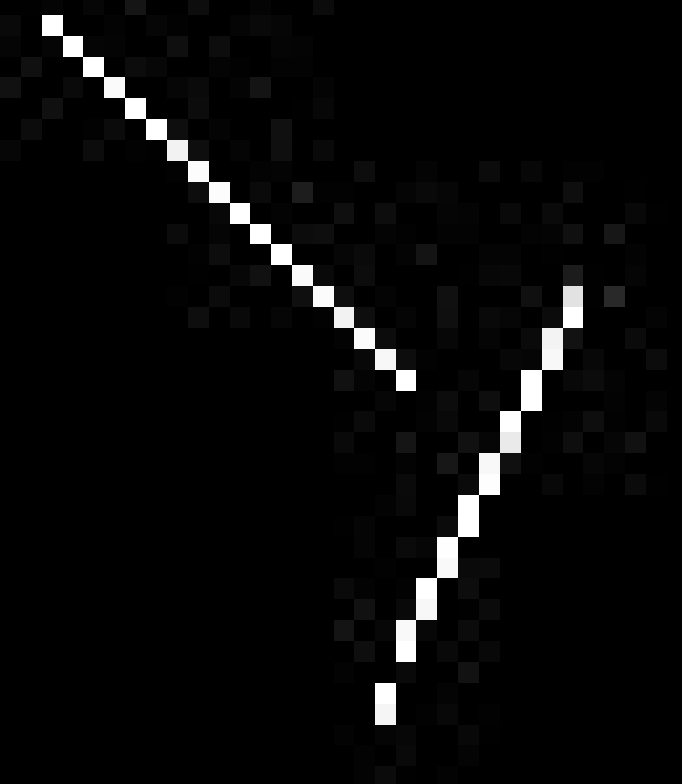

In [ ]:
img_file

In [36]:
#filename = 'data/data1.jpg'
#출처: https://yihs.tistory.com/entry/CV2-Hough-Transform [블로그:티스토리]

data = cv2.imread('/content/detectLines.png')
#data = cv2.cvtColor(img_file, cv2.COLOR_BGR2GRAY)
data = cv2.imread('detectLines.png', cv2.IMREAD_GRAYSCALE)

# parameter
unit_theta = np.pi/180
unit_rho = 3
max_rho = data.shape[0]**2 + data.shape[1]**2
grid_rho = max_rho // unit_rho

list_theta = np.arange(0, np.pi, unit_theta)

sin_data = [np.sin(x) for x in list_theta]
cos_data = [np.cos(x) for x in list_theta]

# set hough matrix
num_row = grid_rho * 2 + 1
hough_data = np.zeros((num_row, len(sin_data)))

for y in reversed(range(data.shape[0])):
    for x in range(data.shape[1]):
        if data[y][x] > 0:
            for ind_theta in range(len(sin_data)):
                rho = round(y * sin_data[ind_theta] + x * cos_data[ind_theta])
                rho += grid_rho
                hough_data[rho][ind_theta] += 1

hough_data = 255*hough_data/np.amax(hough_data)
pil_image=Image.fromarray(hough_data)
pil_image.show()


In [37]:
img_ = cv2.imread('detectLines.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img_, 50, 150, apertureSize=3)

In [38]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

In [39]:
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]  # line[0]에서 각 점의 좌표를 가져옵니다.
        cv2.line(img_, (x1, y1), (x2, y2), (0, 255, 0), 2)
else:
    print("No lines found.")

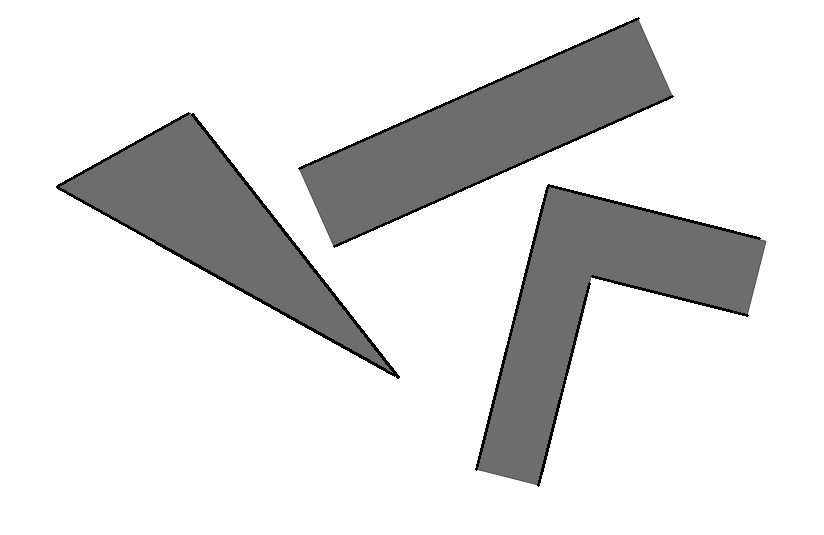

In [40]:
cv2_imshow(img_)

In [ ]:
data = cv2.imread('/content/twoline.png')
data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

# parameter
unit_theta = np.pi/180
unit_rho = 3
max_rho = data.shape[0]**2 + data.shape[1]**2
grid_rho = max_rho // unit_rho

list_theta = np.arange(0, np.pi, unit_theta)

sin_data = [np.sin(x) for x in list_theta]
cos_data = [np.cos(x) for x in list_theta]

# set hough matrix
num_row = grid_rho * 2 + 1
hough_data = np.zeros((num_row, len(sin_data)))

for y in reversed(range(data.shape[0])):
    for x in range(data.shape[1]):
        if data[y][x] > 0:
            for ind_theta in range(len(sin_data)):
                rho = round(y * sin_data[ind_theta] + x * cos_data[ind_theta])
                rho += grid_rho
                hough_data[rho][ind_theta] += 1

hough_data = 255*hough_data/np.amax(hough_data)
pil_image=Image.fromarray(hough_data)
# pil_image.show()
pil_image.save('hough_transform.png')

OSError: cannot write mode F as PNG

In [ ]:


low_thresh = 100
high_thresh = 200

np_image = np.array(image)

canny_image = cv2.Canny(np_image, low_thresh, high_thresh)

canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)
canny_iamge = Image.fromarray(canny_image)

print(image.size)

canny_image

(1400, 845)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)